In [7]:
# Import all required modules
import pandas as pd
import geopandas as gpd
import numpy as np
import h3

from data_processing_helpers import * 
from visualisation_helpers import *
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# read input data
df = pd.read_csv("../input/dataset_240526_res_1.csv") # primary data
trips_df_with_anom = pd.read_csv("../temp/trips_df_without_duplicates.csv") # trips with anomalies data
trips_df_cleaned = pd.read_csv("../temp/trips_df_cleaned.csv") # cleaned trips data
trips_summary_df = pd.read_csv("../temp/trips_summary_df.csv") # trips summary data

all_ports = pd.read_csv("../input/all_ports.csv")    # port particulars data
all_ports.loc[all_ports['country'] == 'Namibia', 'country_code'] = 'NA' # Nambia with port code NA is eroneously read as a Nan
vessel_particulars = pd.read_csv("../input/vessel_particulars.csv") # vessel particulars data	

In [9]:
len(trips_summary_df["locode_next"].drop_duplicates()), len(trips_summary_df["country_code_next"].drop_duplicates())

(1323, 175)

## 1. Frequency Plots for Vessels and Trips

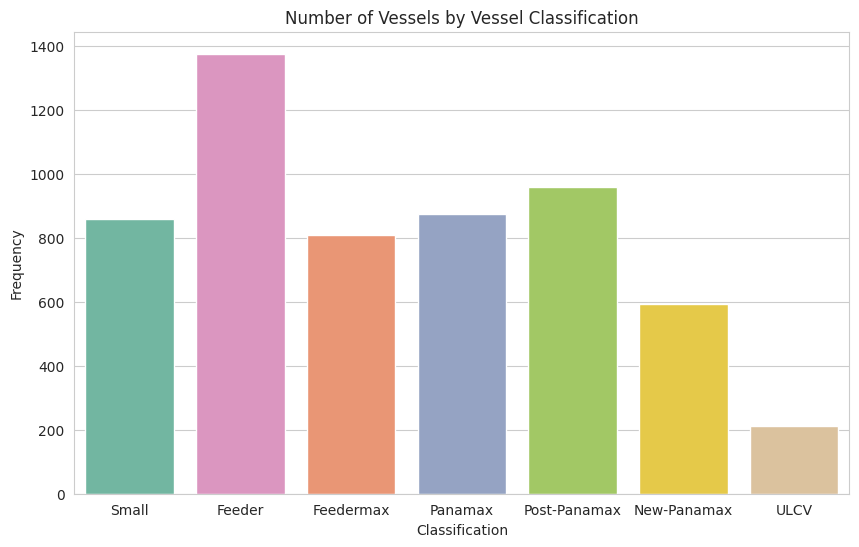

In [10]:
# Plot the number of vessels by classification
vessels_df = trips_df_cleaned[["imo","classification"]].drop_duplicates().reset_index(drop=True)
sns.set_style("whitegrid")
bar_order = ['Small', 'Feeder', 'Feedermax', 'Panamax', 'Post-Panamax', 'New-Panamax', 'ULCV']
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='classification', data=vessels_df, hue='classification',palette='Set2', order=bar_order) 
plt.title('Number of Vessels by Vessel Classification')
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.savefig('../output/figures/classification_freq.png', format='png', dpi=300)
plt.show()

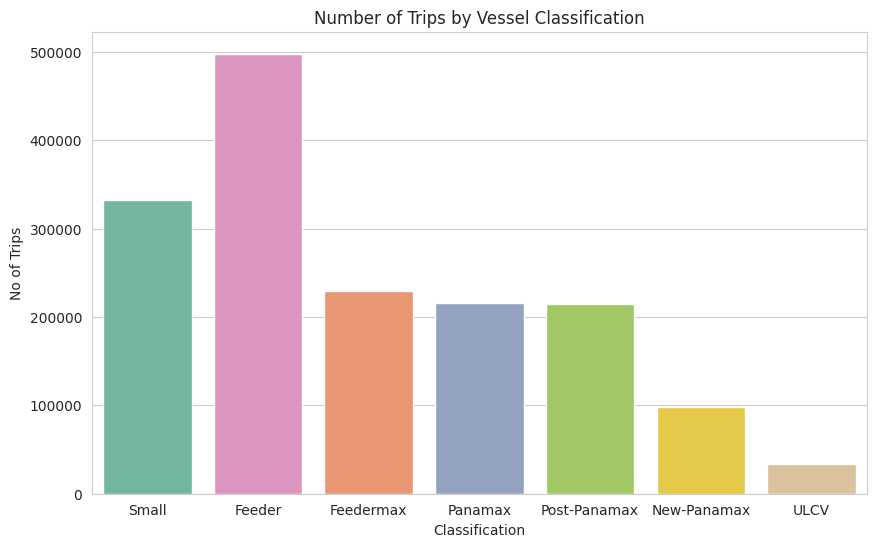

In [11]:
# Plot the number of vessels by classification
summarised_vessels_df = trips_summary_df[["imo","classification"]].reset_index(drop=True)
sns.set_style("whitegrid")
bar_order = ['Small', 'Feeder', 'Feedermax', 'Panamax', 'Post-Panamax', 'New-Panamax', 'ULCV']
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='classification', data=summarised_vessels_df, hue='classification',palette='Set2', order=bar_order) 
plt.title('Number of Trips by Vessel Classification')
plt.xlabel('Classification')
plt.ylabel('No of Trips')
plt.savefig('../output/figures/classification_trips.png', format='png', dpi=300)
plt.show()

## 2. Demonstrating the Difference between resolution h3 resolutions 1 & 2

In [12]:
trip = trips_df_cleaned[trips_df_cleaned["imo"]== 9811000][70:90]
map_1 = visualise_trip(trip, all_ports)
map_1

/home/datahub/vessel_destination_prediction/code/visualisation_helpers.py:39: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_index_boundaries_sample = pd.unique(index_boundaries_sample).tolist()


In [13]:
map_1.save('../output/figures/map_res_1.html')

In [14]:
trips_df_cleaned_2 = trips_df_cleaned.copy()
trips_df_cleaned_2['cell_h3'] = trips_df_cleaned_2.apply(get_h3_cell, resolution=2, axis=1)
trip = trips_df_cleaned_2[trips_df_cleaned_2["imo"]== 9811000][70:90]
map_2 = visualise_trip(trip, all_ports)
map_2

/home/datahub/vessel_destination_prediction/code/visualisation_helpers.py:39: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_index_boundaries_sample = pd.unique(index_boundaries_sample).tolist()


In [15]:
map_2.save('../output/figures/map_res_2.html')

### 3. Demonstrating the effect of cleaning Anomalies in Dataset   
The first plot is represents a sample trip with anomaly; the second plot shows the outcome after cleaning the anomalous tile

In [16]:
# Perform a left merge to find non-matching rows in dfA
difference_df = pd.merge(trips_df_with_anom, trips_df_cleaned, on=["imo","timestamp","pos_latitude","pos_longitude","locode_last","locode_next","classification","cell_h3"], how='left', indicator=True)
difference_df = difference_df[difference_df['_merge'] == 'left_only']
difference_df.drop(columns=['_merge'], inplace=True)

In [17]:
trip = trips_df_with_anom[3755661-7: 3755661+10]
map_3 = visualise_trip(trip, all_ports)
map_3

/home/datahub/vessel_destination_prediction/code/visualisation_helpers.py:39: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_index_boundaries_sample = pd.unique(index_boundaries_sample).tolist()


In [18]:
map_3.save('../output/figures/map_with_anom.html')

In [19]:
trip = trips_df_cleaned[3754813 - 8: 3754813+8]
map_4 = visualise_trip(trip, all_ports)
map_4

/home/datahub/vessel_destination_prediction/code/visualisation_helpers.py:39: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_index_boundaries_sample = pd.unique(index_boundaries_sample).tolist()


In [20]:
map_4.save('../output/figures/map_without_anom.html')

### 4. Demostration of the effect of Trip Summarisation   
The first table represents a couple of trips before summarisation; the second table represents the same trips after summarisation

In [21]:
sample_trips_original= trips_df_cleaned[2334156:2334156+9][["imo","timestamp","country_code_last","country_code_next","month_str","cell_h3"]]
sample_trips_original

,imo,timestamp,country_code_last,country_code_next,month_str,cell_h3
2334156,9410272,2021-05-09,MY,SG,May,81653ffffffffff
2334157,9410272,2021-05-11,SG,ID,May,81653ffffffffff
2334158,9410272,2021-05-14,ID,MY,May,81653ffffffffff
2334159,9410272,2021-05-16,MY,ID,May,81653ffffffffff
2334160,9410272,2021-05-19,ID,MY,May,81653ffffffffff
2334161,9410272,2021-05-21,MY,SG,May,81653ffffffffff
2334162,9410272,2021-05-23,SG,ID,May,81653ffffffffff
2334163,9410272,2021-05-26,ID,MY,May,81653ffffffffff
2334164,9410272,2021-05-28,MY,ID,May,81653ffffffffff


In [22]:
sample_trips_summarised = trips_summary_df[596306:596306+2][["imo","country_code_last","country_code_next","month_str","tiles"]]
sample_trips_summarised

,imo,country_code_last,country_code_next,month_str,tiles
596306,9321483,NL,FR,Dec,"81197ffffffffff, 81187ffffffffff"
596307,9321483,FR,MA,Jan,"81187ffffffffff, 81393ffffffffff"


### 5. Calculating Average Number of Tiles

In [24]:
trips_summary_df['num_tiles'] = trips_summary_df['tiles'].str.split(',').apply(len)
classes = trips_df_cleaned['classification'].drop_duplicates().to_list()
average_tiles = trips_summary_df.groupby('classification')['num_tiles'].mean().reset_index()
average_tiles.columns = ['Classification', 'Average Number of Tiles'] # Rename the columns for clarity
average_tiles

,Classification,Average Number of Tiles
0,Feeder,2.046836
1,Feedermax,2.666857
2,New-Panamax,4.261611
3,Panamax,3.424647
4,Post-Panamax,3.766209
5,Small,1.712956
6,ULCV,4.176034


In [17]:
# number of trips with <= 10 tiles
len(trips_summary_df[(trips_summary_df["num_tiles"] <= 10)])/ len(trips_summary_df)

0.9686417741581647

In [18]:
for clas in classes:
    print(f'{clas}: {len(trips_summary_df[(trips_summary_df["num_tiles"] <= 10) & (trips_summary_df["classification"] == clas)]) / len(trips_summary_df[trips_summary_df["classification"] == clas])}')

Small: 0.9994772168708725
Feedermax: 0.9808218938761962
Panamax: 0.9451476793248945
Feeder: 0.995609101573171
Post-Panamax: 0.9177581593936739
New-Panamax: 0.8775124671182929
ULCV: 0.9241951621446648


### 7. Calculating avg, min, median and max tile area

In [19]:
# extract needed columns
trips_df = df[["imo","timestamp","latitude","longitude","locode_last","locode_next"]]
trips_df= trips_df.rename(columns={"latitude":"pos_latitude","longitude":"pos_longitude"})
trips_df = pd.merge( left= trips_df, right= vessel_particulars, on= 'imo',  how= 'left')

trips_df = trips_df[trips_df["classification"].notna()]
trips_df = trips_df.sort_values(by= ["imo","timestamp"])
trips_df['cell_h3'] = trips_df.apply(get_h3_cell, resolution=2, axis=1)
trips_df=trips_df.reset_index(drop=True)

cells = trips_df["cell_h3"].drop_duplicates().to_list()
cells_area = [h3.cell_area(x) for x in cells]

# average, min and max area of cells
sum(cells_area) / len(cells_area), min(cells_area), max(cells_area)

(86211.72848014608, 44930.89849787883, 104599.80721892575)

In [20]:
# median area of cells
sorted_values = sorted(cells_area)
length = len(sorted_values)
mid = length // 2

# If even number of elements, take the average of the two central elements
if length % 2 == 0:
    median = (sorted_values[mid - 1] + sorted_values[mid]) / 2.0
else:
    # If odd, take the middle element
    median = sorted_values[mid]
median

88726.54382006529